In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
sns.set()


In [2]:
def u(xi, a, k, m):
    if xi > a:
        return k * ((xi - a) ** m)
    elif xi < -a:
        return k * ((-xi - a) ** m)
    return 0

In [3]:
def f12_function(x:np.array):
    n = len(x)
    y = x+1  # Transform x by adding 1 to each component
    term1 = 10 * np.sin(np.pi * y[0])
    term2 = sum((y[:-1] - 1) ** 2 * (1 + 10 * (np.sin(np.pi * y[1:])** 2) ))
    term3 = (y[-1] - 1) ** 2
    sum_u = sum(u(xi, 10, 100, 4) for xi in x)

    
    return np.pi / n * (term1 + term2 + term3) + sum_u
 
    
    
    

In [4]:
x1 = np.arange(-10,8)
x2 = np.arange(-10,8)


In [5]:
pasangan = []
y_hasil= []

for i in x1:
    for j in x2:
        pasangan.append([i,j])
        y_hasil.append(f12_function(np.array([i,j])))

In [6]:
y_hasil

[314.1592653589793,
 284.3141351498763,
 257.610597594363,
 234.0486526924396,
 213.62830044410595,
 196.34954084936206,
 182.21237390820798,
 171.2167996206437,
 163.36281798666923,
 158.65042900628453,
 157.07963267948963,
 158.65042900628453,
 163.36281798666923,
 171.2167996206437,
 182.21237390820798,
 196.34954084936206,
 213.62830044410595,
 234.0486526924396,
 284.3141351498763,
 254.46900494077323,
 227.76546738526,
 204.20352248333654,
 183.78317023500293,
 166.50441064025907,
 152.367243699105,
 141.37166941154072,
 133.51768777756624,
 128.80529879718154,
 127.23450247038664,
 128.80529879718154,
 133.51768777756624,
 141.37166941154072,
 152.367243699105,
 166.50441064025907,
 183.78317023500293,
 204.20352248333654,
 257.610597594363,
 227.76546738526,
 201.06192982974676,
 177.4999849278233,
 157.07963267948966,
 139.8008730847458,
 125.66370614359172,
 114.66813185602744,
 106.81415022205297,
 102.10176124166827,
 100.53096491487337,
 102.10176124166827,
 106.8141502220

In [7]:
ind=y_hasil.index(min(y_hasil))

In [8]:
pasangan[ind]

[0, 0]

In [9]:
x_axes = [x[0] for x in pasangan]
z = [x[1] for x in pasangan]


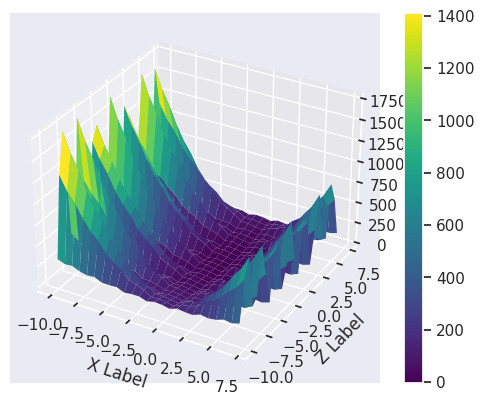

In [10]:
x = np.linspace(-10, 7, 25)  # Change these ranges as needed
z = np.linspace(-10, 7, 25)  # Same as above

X, Y = np.meshgrid(x, z)
Z = np.zeros_like(X)

# Evaluate function at each point in the meshgrid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f12_function(np.array([X[i, j], Y[i, j]]))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Z Label')
ax.set_zlabel('Z Label')
fig.colorbar(surf)
plt.show()

In [11]:
# velocity PSO
def velocity(v, w, c1, c2, x, pbest, gbest):
    return w * v + c1 * np.random.rand() * (pbest - x) + c2 * np.random.rand() * (gbest - x)

def new_position(x, v,w,c1,c2,pbest,gbest):
    return x + velocity(v,w,c1,c2,x,pbest,gbest) 

In [41]:
import random

class PSO:
    def __init__(self,objective_function, n_particles, n_dimensions, w, c1, c2, n_iterations,upper_bound,lower_bound):
        self.obj_function = objective_function
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.w = w
        self.upper_bound = upper_bound
        self.lower_bound = lower_bound
        self.c1 = c1
        self.c2 = c2
        self.n_iterations = n_iterations
        self.pbest = np.zeros((n_particles, n_dimensions))
        self.gbest = np.zeros(n_dimensions)
        self.pbest_score = np.zeros(n_particles)
        self.gbest_score = math.inf
        self.particles = np.random.rand(n_particles, n_dimensions) * (self.upper_bound-self.lower_bound) + self.lower_bound
        self.velocities = np.zeros((n_particles, n_dimensions))
        self.history_particel = []
    
    def velocity(self,x):
        
        return self.w * x + self.c1 * np.random.rand() * (self.pbest - x) + self.c2 * np.random.rand() * (self.gbest - x)
    
    def position(self,x):
        return x + self.velocity(x)
    
    def fit(self):
        for i in range(self.n_iterations):
            for j in range(self.n_particles):
                score = self.obj_function(self.particles[j])
                if score < self.pbest_score[j]:
                    self.pbest_score[j] = score
                    self.pbest[j] = self.particles[j]
                if score < self.gbest_score:
                    self.gbest_score = score
                    self.gbest = self.particles[j]
            print(f"iterasi-{i+1} : global terbaik {self.gbest} score : {self.gbest_score} ")
            self.velocities = self.velocity(self.particles)
            self.particles = self.position(self.particles)
            self.history_particel.append(self.particles)
        return self.gbest
    

In [14]:
x_1 = [i for i in range(-10,8)]
x_2 = [i for i in range(-10,8)]

ruang_solusi = []
for i in x_1:
    for j in x_2:
        ruang_solusi.append([i,j])

In [17]:
pso = PSO(f12_function,10,2,1,1,1,100,7,-10)
pso.fit()

iterasi-1 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-2 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-3 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-4 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-5 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-6 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-7 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-8 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-9 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-10 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-11 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-12 : global terbaik [ 4.24727507 -0.99783746] score : 18.90150923045993 
iterasi-13 : global terbaik [ 4.24727

array([ 4.24727507, -0.99783746])

In [15]:
sol = pso.gbest
sol

array([ 0.29170666, -0.31963275])

In [16]:
f12_function(np.array([0.57412774 ,  0.40633379]))

-9.764664728012804

In [18]:
import numpy as np
import pyswarms as ps

def F12(x):
    n = x.shape[1]  # Ambil ukuran dimensi
    y = x + 1  # Transformasi x dengan menambahkan 1 ke setiap komponen
    sin_term = np.sin(np.pi * y[:, :-1])
    sin_next = np.sin(np.pi * y[:, 1:])
    term1 = 10 * sin_term[:, 0]
    term2 = np.sum((y[:, :-1] - 1)**2 * (1 + 10 * sin_next**2), axis=1)
    term3 = (y[:, -1] - 1)**2
    total = (np.pi / n) * (term1 + term2 + term3)
    return total

# Setel opsi optimizer
options = {'c1': 1, 'c2': 1, 'w': 1}

# Buat instance Global Best PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Lakukan optimasi
cost, pos = optimizer.optimize(F12, iters=100)

print("Cost:", cost)
print("Best position:", pos)


2024-05-07 10:56:04,222 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-15.3
2024-05-07 10:56:04,901 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -15.319214499014041, best pos: [0.48630019 0.0084482 ]


Cost: -15.319214499014041
Best position: [0.48630019 0.0084482 ]


iterasi-1 : global terbaik [ 0.26912143 -2.63396996] score : 0.20539979449601198 
iterasi-2 : global terbaik [ 0.26912143 -2.63396996] score : 0.20539979449601198 
iterasi-3 : global terbaik [ 0.12988206 -1.27119358] score : -3.5181599009356446 
iterasi-4 : global terbaik [ 0.12988206 -1.27119358] score : -3.5181599009356446 
iterasi-5 : global terbaik [ 0.64798131 -0.972707  ] score : -11.84670262860226 
iterasi-6 : global terbaik [ 0.41548792 -0.94203218] score : -13.403496566600273 
iterasi-7 : global terbaik [ 0.46996223 -0.99943303] score : -13.722115462435744 
iterasi-8 : global terbaik [ 0.46996223 -0.99943303] score : -13.722115462435744 
iterasi-9 : global terbaik [ 0.46996223 -0.99943303] score : -13.722115462435744 
iterasi-10 : global terbaik [ 0.46996223 -0.99943303] score : -13.722115462435744 
iterasi-11 : global terbaik [ 0.46996223 -0.99943303] score : -13.722115462435744 
iterasi-12 : global terbaik [ 0.46996223 -0.99943303] score : -13.722115462435744 
iterasi-13 : g

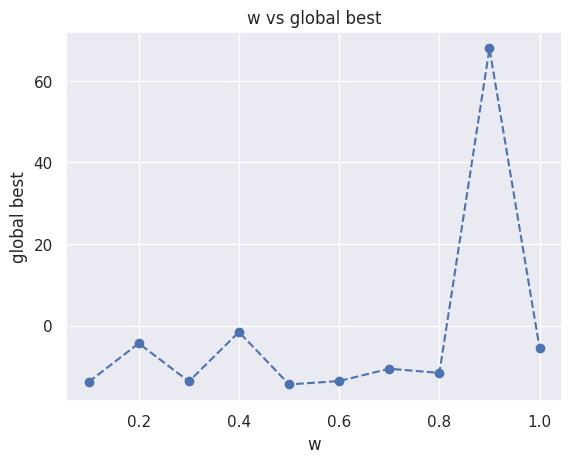

In [25]:
#w range 0.1 - 1 , c1 =1 , c2 = 1 , iterasi = 100 , partikel =10
w = [i/10 for i in range(1,11)]
hasil_w = []
for i in w:
    pso_w = PSO(f12_function,10,2,i,1,1,100,7,-10)
    pso_w.fit()
    hasil_w.append(pso_w.gbest_score)

#plot
plt.plot(w, hasil_w, linestyle='--', marker='o')
plt.xlabel("w")
plt.ylabel("global best")
plt.title("w vs global best")
plt.show()



iterasi-1 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-2 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-3 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-4 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-5 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-6 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-7 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-8 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-9 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-10 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-11 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-12 : global terbaik [-0.9544311  -0.89701882] score : 6.382059873543491 
iterasi-13 : global terbaik [-0.95443

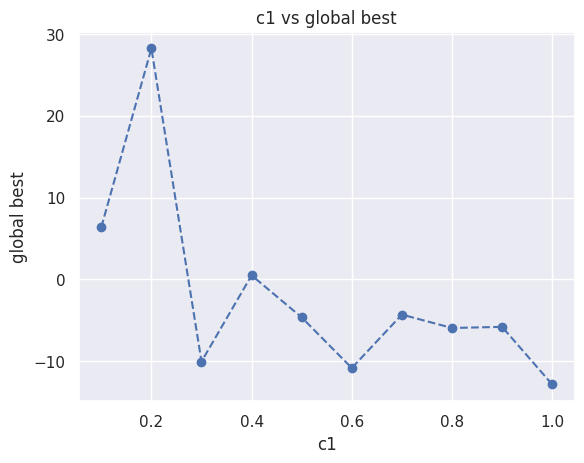

In [26]:
#c1 range 0.1 - 1 , c2 =1 , w = 1 , iterasi = 100 , partikel =10

c1 = [i/10 for i in range(1,11)]
hasil_c1 = []
for i in c1:
    pso_c1 = PSO(f12_function,10,2,1,i,1,100,7,-10)
    pso_c1.fit()
    hasil_c1.append(pso_c1.gbest_score)

#plot
plt.plot(c1, hasil_c1, linestyle='--', marker='o')
plt.xlabel("c1")
plt.ylabel("global best")
plt.title("c1 vs global best")
plt.show()

iterasi-1 : global terbaik [0.62280227 1.71603717] score : -5.6268916910169855 
iterasi-2 : global terbaik [0.6850825  1.88764089] score : -5.911251796836391 
iterasi-3 : global terbaik [0.6850825  1.88764089] score : -5.911251796836391 
iterasi-4 : global terbaik [0.6850825  1.88764089] score : -5.911251796836391 
iterasi-5 : global terbaik [0.28861166 0.90561612] score : -10.838794327675325 
iterasi-6 : global terbaik [0.53746415 0.98672261] score : -13.608287005450505 
iterasi-7 : global terbaik [0.53746415 0.98672261] score : -13.608287005450505 
iterasi-8 : global terbaik [0.53746415 0.98672261] score : -13.608287005450505 
iterasi-9 : global terbaik [0.53746415 0.98672261] score : -13.608287005450505 
iterasi-10 : global terbaik [0.53746415 0.98672261] score : -13.608287005450505 
iterasi-11 : global terbaik [0.51756828 0.96584436] score : -13.749675958254626 
iterasi-12 : global terbaik [0.51756828 0.96584436] score : -13.749675958254626 
iterasi-13 : global terbaik [0.51756828 

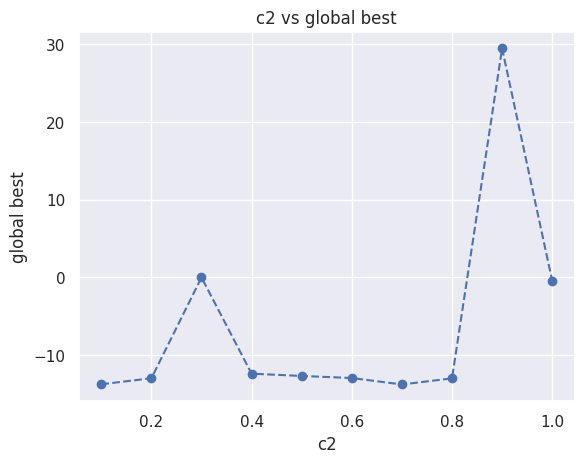

In [27]:
#c2 range 0.1 - 1 , c1 =1 , w = 1 , iterasi = 100 , partikel =10

c2 = [i/10 for i in range(1,11)]
hasil_c2 = []
for i in c2:
    pso_c2 = PSO(f12_function,10,2,i,1,1,100,7,-10)
    pso_c2.fit()
    hasil_c2.append(pso_c2.gbest_score)

#plot
plt.plot(c2, hasil_c2, linestyle='--', marker='o')
plt.xlabel("c2")
plt.ylabel("global best")
plt.title("c2 vs global best")
plt.show()

iterasi-1 : global terbaik [-0.77839196 -2.46217933] score : 29.931695878877086 
iterasi-2 : global terbaik [-0.77839196 -2.46217933] score : 29.931695878877086 
iterasi-3 : global terbaik [0.59724201 0.57050863] score : -8.5765468088325 
iterasi-4 : global terbaik [0.59724201 0.57050863] score : -8.5765468088325 
iterasi-5 : global terbaik [0.59724201 0.57050863] score : -8.5765468088325 
iterasi-6 : global terbaik [0.59724201 0.57050863] score : -8.5765468088325 
iterasi-7 : global terbaik [0.59724201 0.57050863] score : -8.5765468088325 
iterasi-8 : global terbaik [0.59724201 0.57050863] score : -8.5765468088325 
iterasi-9 : global terbaik [0.59724201 0.57050863] score : -8.5765468088325 
iterasi-10 : global terbaik [0.59724201 0.57050863] score : -8.5765468088325 
iterasi-1 : global terbaik [-0.88579391 -0.14341255] score : 9.117577968215844 
iterasi-2 : global terbaik [-1.50113186 -0.24303751] score : 4.8486975290039105 
iterasi-3 : global terbaik [-1.50113186 -0.24303751] score :

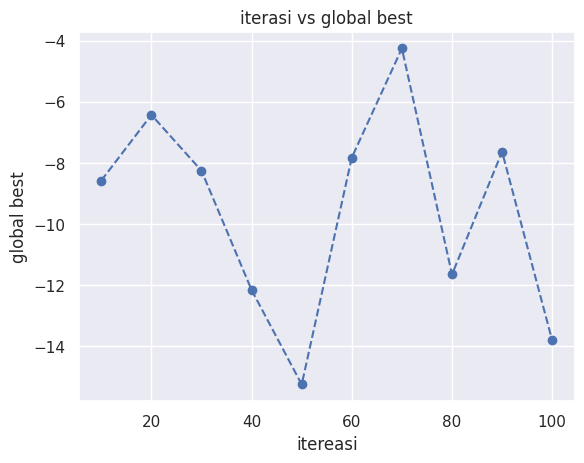

In [23]:
#w =1 , c1 =1 , c2 = 1 , iterasi = 100, iterasi 10 -100 , partikel =10
iter = [i*10 for i in range(1,11)]
hasil_iter = []

for i in iter:
    pso_iter = PSO(f12_function,10,2,1,1,1,int(i),7,-10)
    pso_iter.fit()
    hasil_iter.append(pso_iter.gbest_score)

#plot
plt.plot(iter, hasil_iter, linestyle='--', marker='o')
plt.xlabel("itereasi")
plt.ylabel("global best")
plt.title("iterasi vs global best")
plt.show()

iterasi-1 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-2 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-3 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-4 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-5 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-6 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-7 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-8 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-9 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-10 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-11 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-12 : global terbaik [0.15340698 2.83850031] score : 5.49961651245888 
iterasi-13 : global terbaik [0.15340698 2.83850031] score : 5.49961651245

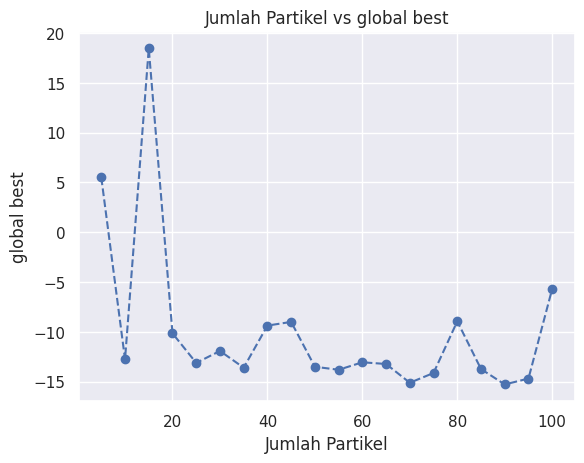

In [24]:
#w = 1 , c1 =1 , c2 = 1 , iterasi = 100, iterasi = 100 , partikel 5 -100
parti = [i*5 for i in range(1,21)]
hasil_parti = []

for i in parti:
    pso_parti = PSO(f12_function,int(i),2,1,1,1,100,7,-10)
    pso_parti.fit()
    hasil_parti.append(pso_parti.gbest_score)

#plot
plt.plot(parti, hasil_parti, linestyle='--', marker='o')
plt.xlabel("Jumlah Partikel")
plt.ylabel("global best")
plt.title("Jumlah Partikel vs global best")
plt.show()

In [28]:
"""_summary_
parameter optimal pso
c1 : 0.6
c2 : 0.7
w : 0.5
iterasi : 50
jumlah partikel : 70
"""

pso2 = PSO(f12_function,70,2,0.5,0.6,0.7,50,7,-10)
pso2.fit()

iterasi-1 : global terbaik [ 0.87942718 -1.060573  ] score : -2.3924237593780626 
iterasi-2 : global terbaik [-1.26712817  1.00860029] score : -7.550088011335581 
iterasi-3 : global terbaik [-1.26712817  1.00860029] score : -7.550088011335581 
iterasi-4 : global terbaik [ 0.57486275 -0.21502107] score : -12.654178359199978 
iterasi-5 : global terbaik [ 0.37774302 -0.03909998] score : -14.303339668506872 
iterasi-6 : global terbaik [ 0.56661453 -0.05864997] score : -14.686248858440695 
iterasi-7 : global terbaik [ 0.4399606  -0.07017237] score : -14.972191692367778 
iterasi-8 : global terbaik [ 0.4399606  -0.07017237] score : -14.972191692367778 
iterasi-9 : global terbaik [ 0.4399606  -0.07017237] score : -14.972191692367778 
iterasi-10 : global terbaik [ 0.52872179 -0.04524211] score : -15.11362297363583 
iterasi-11 : global terbaik [ 0.52872179 -0.04524211] score : -15.11362297363583 
iterasi-12 : global terbaik [ 0.52872179 -0.04524211] score : -15.11362297363583 
iterasi-13 : globa

array([ 0.52872179, -0.04524211])

iterasi-1 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-2 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-3 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-4 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-5 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-6 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-7 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-8 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-9 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-10 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-11 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-12 : global terbaik [ 0.48037473 -1.84661276] score : -9.180722751082063 
iterasi-13 : global terba

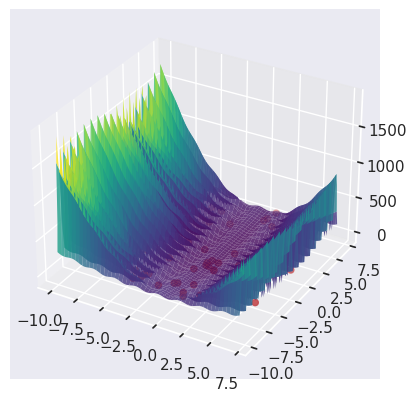

In [44]:
x = np.linspace(-10, 7, 100)
y = np.linspace(-10, 7, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f12_function(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
pso3 = PSO(f12_function,70,2,0.5,0.6,0.7,50,7,-10)
points = ax.scatter(pso3.particles[:, 0], pso3.particles[:, 1], [f12_function(p) for p in pso3.particles], color='r')
pso3.fit()
list_poin = pso3.history_particel


def update(frame):
    titik_poin = list_poin[frame]
    print(titik_poin)
    points._offsets3d = (titik_poin[:, 0], titik_poin[:, 1], [f12_function(p) for p in titik_poin])
    return points,

ani = FuncAnimation(fig, update, frames=np.arange(len(list_poin)), interval=100,)
plt.show()